## РК1

Стельмах Яна Сергеевна ИУ5-21М

Вариант 10

Задачи 10, 30

Дополнительные данные: для пары произвольных колонок данных построить график "Диаграмма рассеяния"

Для выполнения этих задач я выберу набор данных "Titanic", который часто используется для демонстрации обработки данных. Он содержит как числовые, так и категориальные признаки, пропуски и потенциально дублирующиеся колонки.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '/Users/Iana/Desktop/2М/MMO/data/Titanic-Dataset.csv'

# Загрузка данных
data = pd.read_csv(file_path)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Задача №10
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.


In [34]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
age_category    177
dtype: int64

Закодируем поле age, чтобы пропуски были в категориальном признаке

In [37]:
def encode_age_category(Age):
    if pd.isnull(Age):
        return np.nan
    if Age < 12:
        return 'ребенок'
    elif Age < 18:
        return 'подросток'
    else:
        return 'взрослый'
data['Age_category'] = data['Age'].apply(encode_age_category)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,взрослый
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,взрослый
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,взрослый
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,взрослый
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,взрослый


: 

In [36]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
age_category    177
dtype: int64

Заполним пропуска в поле Age с помощью метода заполнения наиболее распространенным значением

In [39]:
most_common_sex = data['Age_category'].mode()[0] # Находим самое частое значение
data['Age_category'].fillna(most_common_sex, inplace=True)  # Заполняем пропуски

data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
age_category    177
Age_category      0
dtype: int64

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,взрослый,взрослый
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,взрослый,взрослый
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,взрослый,взрослый
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,взрослый,взрослый
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,взрослый,взрослый


## Задача №30

Для набора данных проведите удаление повторяющихся признаков.

Повторяющееся признаки в машинном обучении - это присутствие в наборе данных признаков, которые имеют одинаковые или очень похожие значения для всех или большинства наблюдений. Такие признаки несут мало информации и могут быть избыточными для модели машинного обучения. 

Сначала загрузим данные и проверим наличие дублирующихся столбцов.

Использую датасет по качеству красных вин.

In [ ]:
file_path = '/Users/Iana/Desktop/2М/MMO/data/wine+quality/winequality-red.csv'

# Загрузка данных
data = pd.read_csv(file_path, sep=';')  # Указываем разделитель ';'

# Проверим дубликаты столбцов по названиям
duplicate_columns = data.columns[data.columns.duplicated()]
print(f"Дублирующиеся названия столбцов: {duplicate_columns.tolist()}")

Дублирующиеся названия столбцов: []


Поиск и удаление семантически дублирующихся признаков.

Повторяющиеся признаки могут иметь разные названия, но одинаковые значения. Для их обнаружения сравним столбцы попарно:

In [59]:
# Создаем список для хранения дубликатов
duplicates = []

# Проверяем все пары столбцов
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns[i+1:]):
        if data[col1].equals(data[col2]):
            duplicates.append((col1, col2))

print(f"Идентичные столбцы: {duplicates}")

Идентичные столбцы: []


Проверка на коррелирующие признаки (для числовых данных):

In [60]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<function matplotlib.pyplot.show(close=None, block=None)>

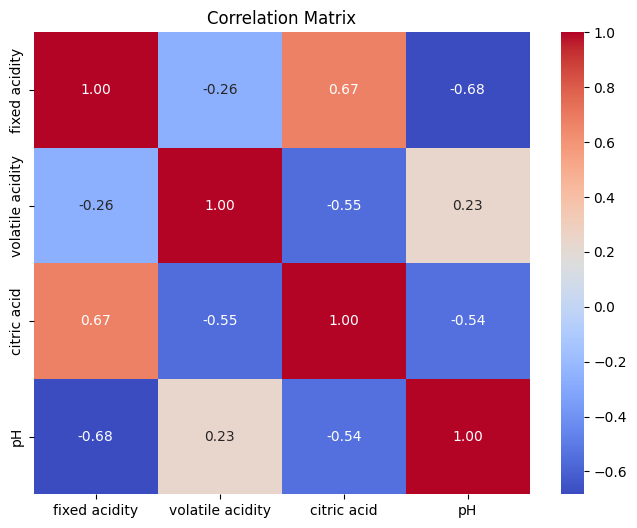

In [61]:
correlation_matrix = data[['fixed acidity', 'volatile acidity', 'citric acid', 'pH']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show

In [65]:
correlation_matrix = data[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]].corr()
#plt.figure(figsize=(8,6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
#plt.show

In [66]:
# Верхний треугольник матрицы (чтобы не учитывать дубли)
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

In [68]:
# Находим признаки с корреляцией > 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Удаляем их
data = data.drop(columns=to_drop)
print("Удалено коррелирующих признаков:", to_drop)

Удалено коррелирующих признаков: ['citric acid', 'total sulfur dioxide', 'density']


## Дополнительные требования 
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

Алкоголь (крепость) снижает плотность вина. График покажет, как эти факторы конкурируют.


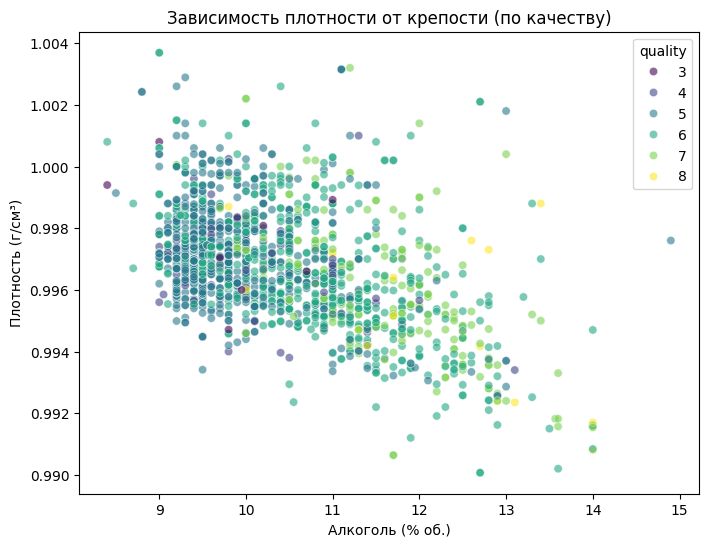

In [ ]:
file_path = '/Users/Iana/Desktop/2М/MMO/data/wine+quality/winequality-red.csv'
data = pd.read_csv(file_path, sep=';') 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='alcohol', y='density', hue='quality', alpha=0.6, palette='viridis')
plt.title('Зависимость плотности от крепости (по качеству)')
plt.xlabel('Алкоголь (% об.)')
plt.ylabel('Плотность (г/см³)')
plt.show()

Высококачественные вина (салатовые и желтые точки) обычно имеют умеренную плотность и средний уровень алкоголя (11-13%).